# This notebook is to explore the AI impact on job dataset and find out which job will be affected the most by 2030

In [2]:
import pandas as pd
df=pd.read_csv("AI_Impact_on_Jobs_2030.csv")

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [9]:
df.describe()
df["Job_Title"].value_counts()

Job_Title
Software Engineer      175
UX Researcher          167
Data Scientist         167
Teacher                166
Graphic Designer       160
HR Specialist          157
Construction Worker    156
Retail Worker          155
Security Guard         154
Truck Driver           153
Financial Analyst      151
Research Scientist     149
Nurse                  142
Chef                   141
AI Engineer            140
Mechanic               136
Marketing Manager      134
Customer Support       133
Lawyer                 132
Doctor                 132
Name: count, dtype: int64

In [10]:
df.head(10)

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
5,AI Engineer,92592,11,Master's,0.29,0.51,0.10,Low,0.71,0.79,0.61,0.93,0.65,0.91,0.85,0.45,0.10,0.37
6,Mechanic,107373,23,PhD,0.67,1.09,0.41,Medium,0.56,0.38,0.97,0.85,0.72,0.24,0.26,0.04,0.71,0.11
7,Teacher,53419,12,High School,0.20,1.40,0.17,Low,0.56,0.70,0.14,0.60,0.54,0.20,0.94,0.60,0.69,0.88
8,HR Specialist,139225,12,Master's,0.30,0.61,0.48,Medium,0.22,0.42,0.88,0.32,0.12,0.36,0.91,0.27,0.65,0.00
9,Customer Support,85016,2,High School,0.01,1.01,0.80,High,0.22,0.12,0.34,0.94,0.32,0.52,0.70,0.36,0.97,0.96


In [30]:
salary=df.groupby("Job_Title")["Average_Salary"].mean().sort_values().reset_index()
import matplotlib.pyplot as plt
salary

,Job_Title,Average_Salary
0,Truck Driver,84519.928105
1,Marketing Manager,86458.111940
2,Research Scientist,87204.744966
3,Retail Worker,87208.412903
4,Security Guard,87290.435065
5,Customer Support,87487.000000
6,UX Researcher,87982.419162
7,Financial Analyst,88030.311258
8,Nurse,88955.323944
9,Doctor,89091.742424


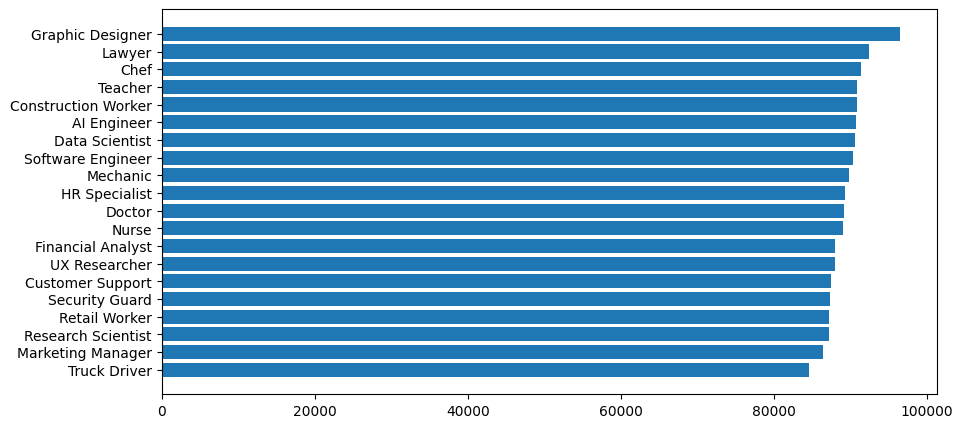

In [32]:
plt.figure(figsize=(10,5))
plt.barh(salary["Job_Title"],salary["Average_Salary"])
plt.show()

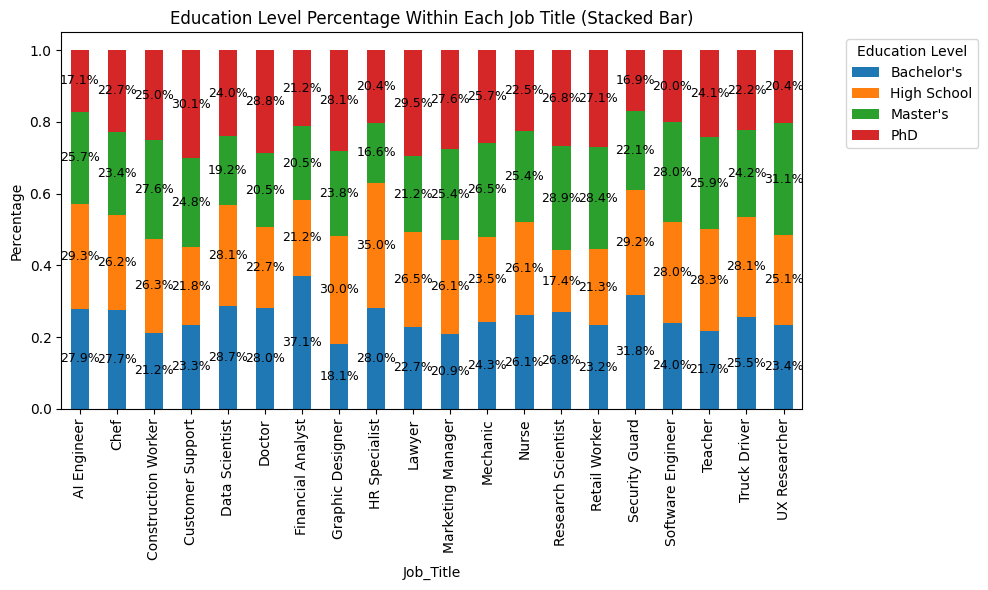

In [41]:
# Crosstab
ct = pd.crosstab(df["Job_Title"], df["Education_Level"])

# Convert to percent per row
ct_pct = ct.div(ct.sum(axis=1), axis=0)

# Plot
ax = ct_pct.plot(kind="bar", stacked=True, figsize=(10, 6))

# Add percentage labels
for i, job in enumerate(ct_pct.index):
    cumulative = 0
    for level in ct_pct.columns:
        val = ct_pct.loc[job, level]
        if val > 0:
            ax.text(
                x=i,
                y=cumulative + val / 2,
                s=f"{val*100:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                color="black"
            )
        cumulative += val

plt.ylabel("Percentage")
plt.title("Education Level Percentage Within Each Job Title (Stacked Bar)")
plt.legend(title="Education Level",bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Customer support job holds the highest percentage of people have PHD degree, following with lawyer and doctor. On the contrast, among all jobs, HR specialist have the highest percentage of people only holding High school degree.

In [44]:
ai_expose=df.groupby("Job_Title")[["AI_Exposure_Index","Tech_Growth_Factor"]].mean().sort_values(by="AI_Exposure_Index",ascending=True).reset_index()

In [45]:
ai_expose

,Job_Title,AI_Exposure_Index,Tech_Growth_Factor
0,Mechanic,0.456544,0.976471
1,Financial Analyst,0.464437,1.027815
2,AI Engineer,0.474286,0.978500
3,UX Researcher,0.475988,0.986886
4,Research Scientist,0.478591,0.962081
5,HR Specialist,0.489236,0.986815
6,Teacher,0.497289,1.008795
7,Customer Support,0.501504,0.991353
8,Construction Worker,0.504808,0.998397
9,Doctor,0.505152,0.963788


Suprisingly, Chef, Nurse, Truck drive have relatively high AI exposure

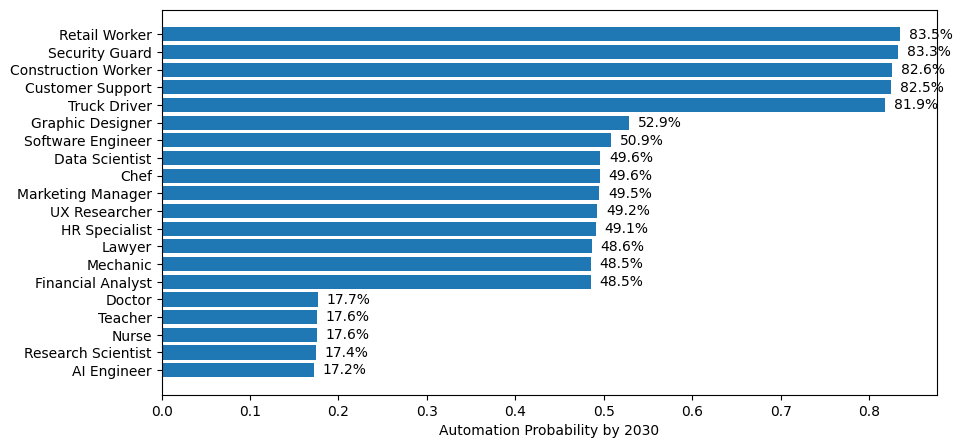

In [51]:
#Automation probability
auto=df.groupby("Job_Title")["Automation_Probability_2030"].mean().sort_values().reset_index()
plt.figure(figsize=(10,5))
plt.barh(auto["Job_Title"],auto["Automation_Probability_2030"])
plt.xlabel("Automation Probability by 2030")
for i, v in enumerate(auto["Automation_Probability_2030"]):
    plt.text(v + 0.01, i, f"{v*100:.1f}%", va="center")

Retail Worker, Security Guard and Construction workers have among the highest average probability to be automated. On the contrast, AI engineer, Nurse and Teacher have among the lowest probability

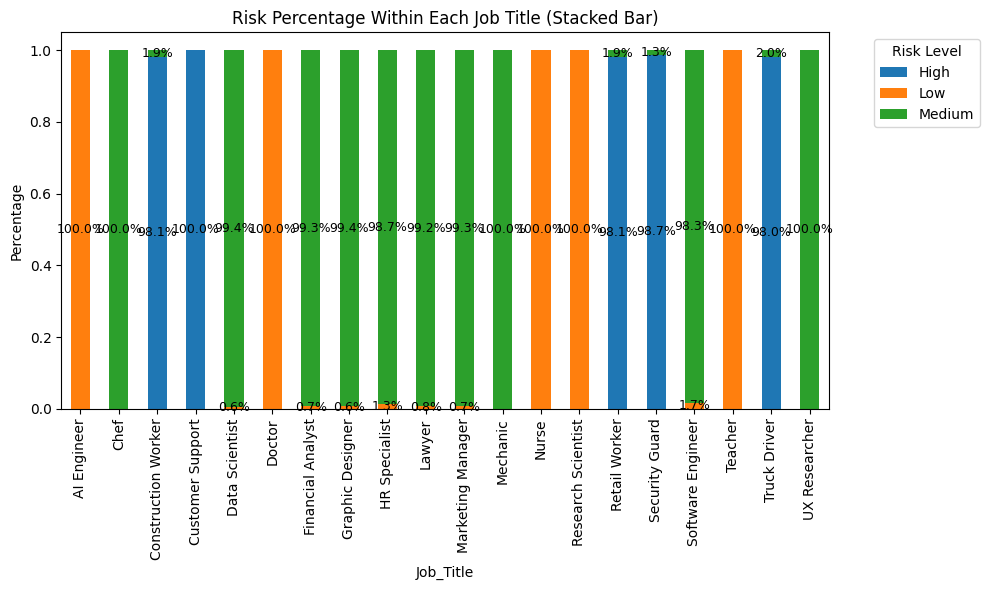

In [47]:
# Crosstab
ct = pd.crosstab(df["Job_Title"], df["Risk_Category"])

# Convert to percent per row
ct_pct = ct.div(ct.sum(axis=1), axis=0)

# Plot
ax = ct_pct.plot(kind="bar", stacked=True, figsize=(10, 6))

# Add percentage labels
for i, job in enumerate(ct_pct.index):
    cumulative = 0
    for level in ct_pct.columns:
        val = ct_pct.loc[job, level]
        if val > 0:
            ax.text(
                x=i,
                y=cumulative + val / 2,
                s=f"{val*100:.1f}%",
                ha="center",
                va="center",
                fontsize=9,
                color="black"
            )
        cumulative += val

plt.ylabel("Percentage")
plt.title("Risk Percentage Within Each Job Title (Stacked Bar)")
plt.legend(title="Risk Level",bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Findings in this plot aligns closely with previous figure, Nurse, teacher, AI Engineer have the lowest risk while Retail worker, Security Guard have among the highest risk.